In [242]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

Position confined to some 1D path: $x= x(\theta)$ and $y= y(\theta)$ A few examples

- Parabola: $x = \theta$ and $y = \theta^2$
- Simple Pendulum: $x = cos(\theta)$ and $y = sin(\theta)$
- Tautochrone: $x = sin(2\theta) + 2\theta$ and $y = 1 - cos(2\theta)$
- Many more..

Kinetic Energy: $T = \frac{1}{2}m(\dot{x}^2 + \dot{y}^2)$  
Potential Energy: $V = mgy$  
The Lagrangian: $L = T - V$
The Lagranges Equation: $ \frac{dL}{d\theta} - \frac{d}{dt}\frac{dL}{\dot{d\theta}} = 0$

Define variables

In [243]:
t, m, g = smp.symbols('t m g')
the = smp.symbols(r'\theta', cls=smp.Function)
the = the(t)
the_d = smp.diff(the, t)
the_dd = smp.diff(the_d, t)

Make sure $x$ and $y$ are functions of $\theta$

In [244]:
x, y = smp.symbols('x y', cls=smp.Function)
x = x(the)
y = y(the)

Defind $x$ and $y$

In [245]:
def findPath(path):
    if path == 'parabola':
        x = the
        y = the**2
        x_f = smp.lambdify(the, x)
        y_f = smp.lambdify(the, y)
    if path == 'simple':
        x = smp.cos(the)
        y = smp.sin(the)
        x_f = smp.lambdify(the, x)
        y_f = smp.lambdify(the, y)
    if path == 'taut':
        x = smp.sin(2*the) + 2*the
        y = 1 - smp.cos(2*the)
        x_f = smp.lambdify(the, x)
        y_f = smp.lambdify(the, y)
    return x, y, x_f, y_f
x, y, x_f, y_f = findPath('simple')

Define $T$, $V$ and $L$

In [246]:
T = 1/2 * m * (smp.diff(x, t)**2 + smp.diff(y, t)**2)
V = m * g * y
L = T - V

Compute $\frac{dL}{d\theta} - \frac{d}{dt}\frac{dL}{\dot{d\theta}}$

In [247]:
LE = smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t)
LE = LE.simplify()

Solve for $d^2\theta/dt$ so we can solve it with an ODE solver.

$$ \frac{d\theta}{dt} = \omega$$
$$ \frac{\omega}{t} =  \frac{d^2\theta}{dt^2} = diffeq1$$

In [248]:
diffeq_1 = the_d
diffeq_2 = smp.solve(LE, the_dd)[0] # second derivative of theta wrt time

Convert this to numpy expression

In [249]:
diffeq1_f = smp.lambdify(the_d, the_d)
diffeq2_f = smp.lambdify((g, the, the_d), diffeq_2)

Create ODE
$$ S = (\theta, \omega)$$
<!-- $$ dS/dt = (d\theta/dt, d\omega/dt)$$ -->

In [250]:
def dSdt(S, t):
    return [
        diffeq1_f(S[1]),
        diffeq2_f(g, S[0], S[1])
    ]

Solve

In [251]:
t = np.linspace(0, 20, 1000)
g = 9.81

# parabola
# ans1 = odeint(dSdt, y0=[2, 0], t=t)
# ans2 = odeint(dSdt, y0=[3, 0], t=t)

# taut
# ans1 = odeint(dSdt, y0=[np.pi/4, 0], t=t)
# ans2 = odeint(dSdt, y0=[np.pi/5, 0], t=t)

# simple
ans1 = odeint(dSdt, y0=[0, 0], t=t)
ans2 = odeint(dSdt, y0=[np.pi,0], t=t)

Plot

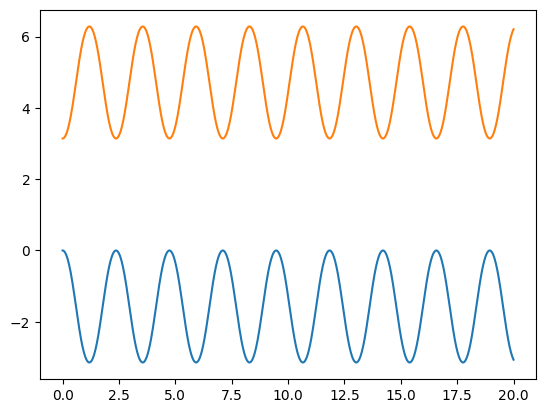

In [252]:
# theta
plt.plot(t, ans1.T[0])
plt.plot(t, ans2.T[0])

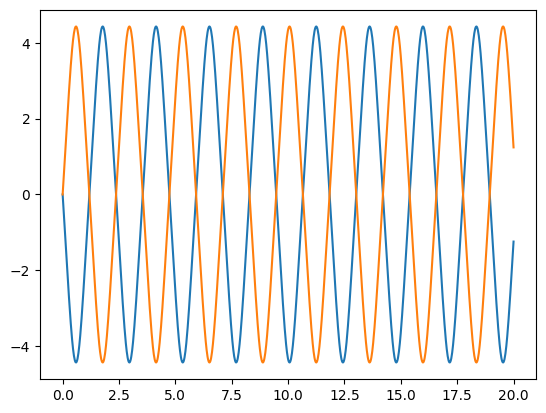

In [253]:
# omega
plt.plot(t, ans1.T[1])
plt.plot(t, ans2.T[1])

Create animation

In [254]:
def get_xy(theta):
    return x_f(theta), y_f(theta)

C:\Users\Sairaaj Surve\AppData\Local\Temp\ipykernel_16156\2889492205.py:2: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ln1.set_data([x1[i], y1[i]])
C:\Users\Sairaaj Surve\AppData\Local\Temp\ipykernel_16156\2889492205.py:3: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ln2.set_data([x2[i], y2[i]])


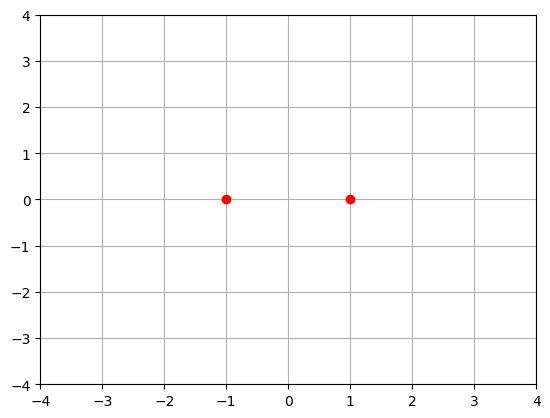

In [255]:
def animate(i):
    ln1.set_data([x1[i], y1[i]])
    ln2.set_data([x2[i], y2[i]])

x1, y1 = get_xy(ans1.T[0])
x2, y2 = get_xy(ans2.T[0])

fig, ax = plt.subplots(1, 1)
ax.grid()
ln1, = plt.plot([], [], 'ro')
ln2, = plt.plot([], [], 'ro')
ax.set_ylim(-4, 4)
ax.set_xlim(-4, 4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif', writer='pillow', fps=50)